# **💡영화 순위 및 장르 분석**  

---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 🔈Process01
* 🔉Process02
* 🔊Process03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 영화 순위 및 장르 분석
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 가설수립/검증, 인사이트 도출
▶ 흥행예측 모델링
```

> **학습목표**

```
▶ 데이터를 Read하고 전처리할 수 있는 역량 습득
▶ 가설수립/검증, 인사이트 도출할 수 있는 역량 습득
▶ 모델링을 통해 영화흥행예측 요소 도출
```

## **문제상황 Introduction**
---

> **시나리오** 🎥

```
A사는 이번에 신규 영화를 촬영할 계획을 가지고 있다. 제작비가 크게 들어가는 만큼 그 만큼의 수익이 발생해야하는 상황이기 때문에 최대한 Risk를  
덜 가져가려고 하고 있다. 이에 과거 상영한 영화의 데이터를 활용하여 감독, 성우에 따라 매출을 극대화하는 캐스팅을 진행하려고 한다.

```  

> **문제정의**

```
▶  신규 영화 제작을 위한 캐스팅 Line-up 불분명
```  

> **기대효과**

```
▶ 매출을 극대화 할 수 있는 감독 및 배우 캐스팅 및 영화 흥행
```

> **해결방안**

```
▶ 과거 영화 데이터 활용 매출 극대화 캐스팅
```

> **성과측정**  

```
▶ 캐스팅 후 영화 제작 및 상영 후 매출 모니터링
```

> **운영**  

```
▶ 캐스팅 결과 활용
```

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

## **🔈Process01**  
**┗ meta 데이터 연결**  
---

### · Total gross data
---


In [2]:
# ▶ Movie total gross
import pandas as pd
df_movie_gross = pd.read_csv('../data/S_PJT14_disney_movies_total_gross.csv')

print(df_movie_gross.shape)
df_movie_gross.head()

(579, 7)


,index,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251\r"
1,1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052\r"
2,2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808\r"
3,3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579\r"
4,4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730\r"


In [3]:
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     579 non-null    int64 
 1   movie_title               579 non-null    object
 2   release_date              579 non-null    object
 3   genre                     562 non-null    object
 4   MPAA_rating               523 non-null    object
 5   total_gross               579 non-null    object
 6   inflation_adjusted_gross  579 non-null    object
dtypes: int64(1), object(6)
memory usage: 31.8+ KB


In [4]:
df_movie_gross.isnull().sum()

index                        0
movie_title                  0
release_date                 0
genre                       17
MPAA_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [5]:
#  문자열 데이터 전처리 및 Null 처리
df_movie_gross['inflation_adjusted_gross'] = df_movie_gross['inflation_adjusted_gross'].str.replace('$', '')
df_movie_gross['inflation_adjusted_gross'] = df_movie_gross['inflation_adjusted_gross'].str.replace(',', '')
df_movie_gross['inflation_adjusted_gross'] = df_movie_gross['inflation_adjusted_gross'].str.replace('\r', '')
df_movie_gross['inflation_adjusted_gross'] = df_movie_gross['inflation_adjusted_gross'].astype(int)

df_movie_gross['total_gross'] = df_movie_gross['total_gross'].str.replace('$', '')
df_movie_gross['total_gross'] = df_movie_gross['total_gross'].str.replace(',', '')
df_movie_gross['total_gross'] = df_movie_gross['total_gross'].str.replace('\r', '')
df_movie_gross['total_gross'] = df_movie_gross['total_gross'].astype(int)

df_movie_gross['genre'].fillna('none', inplace = True)
df_movie_gross['MPAA_rating'].fillna('none', inplace = True)

df_movie_gross = df_movie_gross.drop(['index'], axis=1)
df_movie_gross.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,184925485,5228953251
1,Pinocchio,"Feb 9, 1940",Adventure,G,84300000,2188229052
2,Fantasia,"Nov 13, 1940",Musical,G,83320000,2187090808
3,Song of the South,"Nov 12, 1946",Adventure,G,65000000,1078510579
4,Cinderella,"Feb 15, 1950",Drama,G,85000000,920608730


In [6]:
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     579 non-null    object
 3   MPAA_rating               579 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [7]:
#  영화별 중복 데이터 존재
df_movie_gross['movie_title'].value_counts()

movie_title
The Jungle Book                 3
Freaky Friday                   2
Cinderella                      2
Bad Company                     2
101 Dalmatians                  2
                               ..
Quiz Show                       1
A Simple Twist of Fate          1
It's Pat                        1
Camp Nowhere                    1
Rogue One: A Star Wars Story    1
Name: count, Length: 573, dtype: int64

In [8]:
#  정글북이여도, 장르와 발매년도에 따라 여러개의 데이터가 존재
df_movie_gross[df_movie_gross['movie_title'] == 'The Jungle Book']

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
13,The Jungle Book,"Oct 18, 1967",Musical,Not Rated,141843000,789612346
194,The Jungle Book,"Dec 25, 1994",Adventure,PG,44342956,88930321
567,The Jungle Book,"Apr 15, 2016",Adventure,PG,364001123,364001123


In [9]:
#  시간 데이터 변환
df_movie_gross['release_date'] = pd.to_datetime(df_movie_gross['release_date'])
df_movie_gross.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [10]:
#  같은 영화라면 최신에 개봉한 영화만 남기기
df_movie_gross = df_movie_gross.sort_values(by=['movie_title', 'release_date'], ascending=[True, False])
df_movie_gross = df_movie_gross.drop_duplicates('movie_title', keep='first')
df_movie_gross.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
252,101 Dalmatians,1996-11-27,Comedy,G,136189294,258728898
337,102 Dalmatians,2000-11-22,Comedy,G,66941559,104055039
133,1492: Conquest of Paradise,1992-10-09,Adventure,PG-13,7099531,14421454
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,none,28200000,528279994
375,25th Hour,2002-12-19,Drama,R,13084595,18325463


In [11]:
#  중복제거 확인
df_movie_gross['movie_title'].value_counts().head(5)

movie_title
101 Dalmatians       1
Stakeout             1
Song of the South    1
Sorority Boys        1
Spaced Invaders      1
Name: count, dtype: int64

### · Voice actor data
---


In [12]:
#  Voice actor
import pandas as pd
df_voice_actor = pd.read_csv('../data/S_PJT14_disney_voice_actors.csv')
print(df_voice_actor.shape)
df_voice_actor.head(5)

(935, 4)


,index,character,voice-actor,movie
0,0,Abby Mallard,Joan Cusack,Chicken Little
1,1,Abigail Gabble,Monica Evans,The Aristocats
2,2,Abis Mal,Jason Alexander,The Return of Jafar
3,3,Abu,Frank Welker,Aladdin
4,4,Achilles,NaN,The Hunchback of Notre Dame


In [13]:
df_voice_actor.isnull().sum()

index           0
character       0
voice-actor    53
movie           0
dtype: int64

In [14]:
#  Col 재정비
df_voice_actor = df_voice_actor[['movie', 'character', 'voice-actor']]
df_voice_actor.columns = ['movie_title', 'character', 'voice_actor']
df_voice_actor.head(5)

,movie_title,character,voice_actor
0,Chicken Little,Abby Mallard,Joan Cusack
1,The Aristocats,Abigail Gabble,Monica Evans
2,The Return of Jafar,Abis Mal,Jason Alexander
3,Aladdin,Abu,Frank Welker
4,The Hunchback of Notre Dame,Achilles,NaN


In [15]:
#  하나의 영화에 참여만 여러명의 성우가 존재한다.
df_voice_actor['movie_title'].value_counts()

movie_title
DuckTales             31
Zootopia              22
Hercules              22
Wreck-It Ralph        21
The Little Mermaid    20
                      ..
The Plow Boy           1
Hold That Pose         1
Grin and Bear It       1
Saludos Amigos         1
The Pirate Fairy       1
Name: count, Length: 139, dtype: int64

### · Director data
---

In [17]:
#  Movie director
df_director = pd.read_csv('../data/S_PJT14_disney_director.csv')
print(df_director.shape)
df_director.head(5)

(56, 3)


,index,name,director
0,0,Snow White and the Seven Dwarfs,David Hand
1,1,Pinocchio,Ben Sharpsteen
2,2,Fantasia,full credits
3,3,Dumbo,Ben Sharpsteen
4,4,Bambi,David Hand


In [18]:
df_director.isnull().sum()

index       0
name        0
director    0
dtype: int64

In [19]:
df_director = df_director[['name', 'director']]
df_director.columns = ['movie_title', 'director']
df_director.head(5)

,movie_title,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


In [20]:
#  중복없음
df_director['movie_title'].value_counts().head(5)

movie_title
Snow White and the Seven Dwarfs    1
Pinocchio                          1
Aladdin                            1
The Lion King                      1
Pocahontas                         1
Name: count, dtype: int64

### · Song data
---


In [22]:
#  Movie song
df_song = pd.read_csv('../data/S_PJT14_disney_characters.csv')
print(df_song.shape)
df_song.head(5)

(56, 6)


,index,movie_title,release_date,hero,villian,song
0,0,\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,1,\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,2,\nFantasia,"November 13, 1940",NaN,Chernabog,NaN
3,3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,4,\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [23]:
df_song.isnull().sum()

index            0
movie_title      0
release_date     0
hero             4
villian         10
song             9
dtype: int64

In [24]:
#  문자열 데이터 처리
import re
df_song['movie_title'] = df_song['movie_title'].str.replace('\n', '')
df_song.fillna('none', inplace=True)
df_song.drop(['index'], axis=1, inplace =True)
df_song.head(5)

,movie_title,release_date,hero,villian,song
0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,"November 13, 1940",none,Chernabog,none
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [25]:
df_song.isnull().sum()

movie_title     0
release_date    0
hero            0
villian         0
song            0
dtype: int64

In [26]:
#  중복 없음
df_song['movie_title'].value_counts().head(5)

movie_title
Snow White and the Seven Dwarfs    1
Pinocchio                          1
Aladdin                            1
The Lion King                      1
Pocahontas                         1
Name: count, dtype: int64

## **🔉Process02**  
**┗ 캐릭터, 감독, 성우에 따른 흥행 분석**  
---


### · Data 연결
---

* df_movie_gross : 영화 수익 (Base data) - 중복 X
* df_voice_actor : 영화 캐릭터 별 성우 - 중복 O
* df_director : 영화 감독 - 중복 X
* df_song : 영화 OST 및 히어로/빌런 - 중복 X

In [27]:
#  중복 없는 데이터 우선 merge
df_merge = pd.merge(df_movie_gross, df_director, how='left', on='movie_title')
df_merge.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director
0,101 Dalmatians,1996-11-27,Comedy,G,136189294,258728898,Wolfgang Reitherman
1,102 Dalmatians,2000-11-22,Comedy,G,66941559,104055039,NaN
2,1492: Conquest of Paradise,1992-10-09,Adventure,PG-13,7099531,14421454,NaN
3,"20,000 Leagues Under the Sea",1954-12-23,Adventure,none,28200000,528279994,NaN
4,25th Hour,2002-12-19,Drama,R,13084595,18325463,NaN


In [28]:
df_song.head(5)

,movie_title,release_date,hero,villian,song
0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,"November 13, 1940",none,Chernabog,none
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [29]:
#  df_song에 release_date 중복 col 이기에 제거 후 merge
df_song = df_song.drop(['release_date'], axis=1)
df_merge = pd.merge(df_merge, df_song, how='left', on='movie_title')
df_merge.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director,hero,villian,song
0,101 Dalmatians,1996-11-27,Comedy,G,136189294,258728898,Wolfgang Reitherman,NaN,NaN,NaN
1,102 Dalmatians,2000-11-22,Comedy,G,66941559,104055039,NaN,NaN,NaN,NaN
2,1492: Conquest of Paradise,1992-10-09,Adventure,PG-13,7099531,14421454,NaN,NaN,NaN,NaN
3,"20,000 Leagues Under the Sea",1954-12-23,Adventure,none,28200000,528279994,NaN,NaN,NaN,NaN
4,25th Hour,2002-12-19,Drama,R,13084595,18325463,NaN,NaN,NaN,NaN


In [30]:
#  중복없음
df_merge['movie_title'].value_counts()

movie_title
101 Dalmatians          1
Stakeout                1
Song of the South       1
Sorority Boys           1
Spaced Invaders         1
                       ..
Green Card              1
Good Morning Vietnam    1
Gone in 60 Seconds      1
Gone Fishin'            1
crazy/beautiful         1
Name: count, Length: 573, dtype: int64

In [31]:
#  영화 흥행 수익 데이터 대비 감독과 음악(OST)가 현저히 적음
df_movie_gross.shape,df_director.shape, df_song.shape

((573, 6), (56, 2), (56, 4))

In [32]:
df_merge.isnull().sum()

movie_title                   0
release_date                  0
genre                         0
MPAA_rating                   0
total_gross                   0
inflation_adjusted_gross      0
director                    528
hero                        529
villian                     529
song                        529
dtype: int64

### · 성우 데이터 처리
---


In [ ]:
df_merge.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director,hero,villian,song
0,101 Dalmatians,1996-11-27,Comedy,G,136189294,258728898,Wolfgang Reitherman,NaN,NaN,NaN
1,102 Dalmatians,2000-11-22,Comedy,G,66941559,104055039,NaN,NaN,NaN,NaN
2,1492: Conquest of Paradise,1992-10-09,Adventure,PG-13,7099531,14421454,NaN,NaN,NaN,NaN
3,"20,000 Leagues Under the Sea",1954-12-23,Adventure,none,28200000,528279994,NaN,NaN,NaN,NaN
4,25th Hour,2002-12-19,Drama,R,13084595,18325463,NaN,NaN,NaN,NaN


In [33]:
#  voice actor의 경우 중복 데이터가 많기 때문에 Hero에 성우와 Villian의 성우만 join
hero_list = list(df_merge[df_merge['hero'].notnull()]['hero'])
Villian_list = list(df_merge[df_merge['villian'].notnull()]['villian'])

print(hero_list)
print(Villian_list)

['Aladdin', 'Alice', 'Milo Thatch', 'Belle', 'Hiro Hamada', 'Bolt', 'Kenai', 'Ace Cluck', 'Cinderella', 'Aladar', 'none', 'Elsa', 'Hercules', 'Maggie', 'Lady and Tramp', 'Lilo and Stitch', 'Lewis', 'Moana', 'Mulan', 'Oliver', 'Pinocchio', 'Pocahontas', 'Aurora', 'Snow White', 'Rapunzel', 'Tarzan', 'Thomas and Duchess', 'Taran', 'Kuzco', 'Tod and Copper', 'Basil', 'Quasimodo', 'Mowgli', 'Simba', 'Ariel', 'Winnie the Pooh', 'Tiana', 'Bernard and Miss Bianca', 'Bernard and Miss Bianca', 'Arthur', 'Jim Hawkins', 'Winnie the Pooh', 'Ralph', 'Judy Hopps']
['Jafar', 'Queen of Hearts', 'Commander Rourke', 'Gaston', 'Professor Callaghan', 'Dr. Calico', 'Denahi', 'Foxy Loxy', 'Lady Tremaine', 'Kron', 'Chernabog', 'Prince Hans', 'Hades', 'Alameda Slim', 'Si and Am', 'none', 'Doris', 'none', 'Shan Yu', 'Sykes', 'Stromboli', 'Governor Ratcliffe', 'Maleficent', 'Evil Queen', 'Mother Gothel', 'Clayton', 'Edgar Balthazar', 'Horned King', 'Yzma', 'Amos Slade', 'Professor Ratigan', 'Claude Frollo', 'Kaa

In [34]:
#  주인공 성우도 2명이 진행한 이력이 있다.
df_voice_actor[df_voice_actor['character'].isin(hero_list)]['movie_title'].value_counts().head(5)

movie_title
Tarzan                       2
The Lion King                2
Dinosaur                     1
Home on the Range            1
The Princess and the Frog    1
Name: count, dtype: int64

In [35]:
#  중복이라면 두명의 배우를 모두 넣기 위해 이름을 구분자 ;
df_hero = pd.DataFrame(df_voice_actor[df_voice_actor['character'].isin(hero_list)].groupby(['movie_title', 'character']).agg(lambda x:"; ".join(x)))
df_hero = df_hero.reset_index()
df_hero = df_hero[['character', 'voice_actor']]
df_hero.columns = ['character', 'hero_actor']
df_hero.head(10)

,character,hero_actor
0,Aladdin,Scott Weinger; Brad Kane
1,Alice,Kathryn Beaumont
2,Milo Thatch,Michael J. Fox
3,Belle,Paige O'Hara
4,Bolt,John Travolta
5,Kenai,Joaquin Phoenix
6,Cinderella,Ilene Woods
7,Aladar,D. B. Sweeney
8,Elsa,Idina Menzel
9,Hercules,Tate Donovan; Joshua Keaton


In [36]:
#  빌런, 중복이 없다.
df_voice_actor[df_voice_actor['character'].isin(Villian_list)]['movie_title'].value_counts().head(5)

movie_title
Home on the Range        1
The Fox and the Hound    1
The Little Mermaid       1
Oliver & Company         1
Pinocchio                1
Name: count, dtype: int64

In [37]:
#  빌런 Data
df_villian = pd.DataFrame(df_voice_actor[df_voice_actor['character'].isin(Villian_list)])
df_villian = df_villian[['character', 'voice_actor']]
df_villian.columns = ['character', 'villian_actor']
df_villian.head(5)

,character,villian_actor
14,Alameda Slim,Randy Quaid
22,Amos Slade,Jack Albertson
167,Chernabog,Corey Burton
184,Clayton,Brian Blessed
222,Denahi,Jason Raize


In [38]:
#  기존 Data
df_merge.head(4)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director,hero,villian,song
0,101 Dalmatians,1996-11-27,Comedy,G,136189294,258728898,Wolfgang Reitherman,NaN,NaN,NaN
1,102 Dalmatians,2000-11-22,Comedy,G,66941559,104055039,NaN,NaN,NaN,NaN
2,1492: Conquest of Paradise,1992-10-09,Adventure,PG-13,7099531,14421454,NaN,NaN,NaN,NaN
3,"20,000 Leagues Under the Sea",1954-12-23,Adventure,none,28200000,528279994,NaN,NaN,NaN,NaN


In [39]:
#  성우 데이터 merge

#  Hero
df_merge = pd.merge(df_merge, df_hero, how='left', left_on='hero', right_on='character')

#  villian
df_merge = pd.merge(df_merge, df_villian, how='left', left_on='villian', right_on='character')

df_merge.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director,hero,villian,song,character_x,hero_actor,character_y,villian_actor
0,101 Dalmatians,1996-11-27,Comedy,G,136189294,258728898,Wolfgang Reitherman,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102 Dalmatians,2000-11-22,Comedy,G,66941559,104055039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1492: Conquest of Paradise,1992-10-09,Adventure,PG-13,7099531,14421454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"20,000 Leagues Under the Sea",1954-12-23,Adventure,none,28200000,528279994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25th Hour,2002-12-19,Drama,R,13084595,18325463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#  중복 col 삭제
df_merge = df_merge.drop(['character_x', 'character_y'], axis=1)
df_merge.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director,hero,villian,song,hero_actor,villian_actor
0,101 Dalmatians,1996-11-27,Comedy,G,136189294,258728898,Wolfgang Reitherman,NaN,NaN,NaN,NaN,NaN
1,102 Dalmatians,2000-11-22,Comedy,G,66941559,104055039,NaN,NaN,NaN,NaN,NaN,NaN
2,1492: Conquest of Paradise,1992-10-09,Adventure,PG-13,7099531,14421454,NaN,NaN,NaN,NaN,NaN,NaN
3,"20,000 Leagues Under the Sea",1954-12-23,Adventure,none,28200000,528279994,NaN,NaN,NaN,NaN,NaN,NaN
4,25th Hour,2002-12-19,Drama,R,13084595,18325463,NaN,NaN,NaN,NaN,NaN,NaN


> **데이터 살펴보기**

* 영화 관련 데이터
* 데이터 명세 ⬇

|movie_title|release_date_x|genre|MPAA_rating|total_gross|inflation_adjusted_gross||
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|영화제목|발매일|장르|영화평점|총수익|인플레이션 반영 수익|
|hero|villian|song|director|hero_actor|villian_actor|
|주인공|빌런|음악|감독|hero 성우|villian 성우|

In [41]:
#  최종 Data set, 하나라도 Na가 있으면 해석할 수 없기 때문에 전체 삭제
df_merge = df_merge.dropna()
df_merge.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director,hero,villian,song,hero_actor,villian_actor
25,Aladdin,1992-11-11,Comedy,G,217350219,441969178,Ron Clements,Aladdin,Jafar,A Whole New World,Scott Weinger; Brad Kane,Jonathan Freeman
53,Beauty and the Beast,1991-11-13,Musical,G,218951625,363017667,Gary Trousdale,Belle,Gaston,Be Our Guest,Paige O'Hara,Richard White
71,Bolt,2008-11-21,Comedy,PG,114053759,133702498,Chris Williams,Bolt,Dr. Calico,I Thought I Lost You,John Travolta,Malcolm McDowell
81,Brother Bear,2003-10-24,Adventure,G,85336277,119218333,Robert Walker,Kenai,Denahi,Look Through My Eyes,Joaquin Phoenix,Jason Raize
97,Cinderella,2015-03-13,Drama,PG,201151353,201151353,Wilfred Jackson,Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo,Ilene Woods,Eleanor Audley; Susanne Blakeslee


### · 흥행 EDA
---


In [42]:
df_merge.shape

(22, 12)

In [43]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 25 to 532
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               22 non-null     object        
 1   release_date              22 non-null     datetime64[ns]
 2   genre                     22 non-null     object        
 3   MPAA_rating               22 non-null     object        
 4   total_gross               22 non-null     int64         
 5   inflation_adjusted_gross  22 non-null     int64         
 6   director                  22 non-null     object        
 7   hero                      22 non-null     object        
 8   villian                   22 non-null     object        
 9   song                      22 non-null     object        
 10  hero_actor                22 non-null     object        
 11  villian_actor             22 non-null     object        
dtypes: datetime64[ns](1), int64

In [44]:
#  장르별 손익
pd.DataFrame(df_merge.groupby('genre')['inflation_adjusted_gross'].mean().sort_values(ascending=False))

,inflation_adjusted_gross
genre,
Musical,3.630177e+08
Adventure,3.440411e+08
Comedy,2.145273e+08
Drama,1.113286e+08


In [45]:
#  감독별 손익
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame(df_merge.groupby('director')['inflation_adjusted_gross'].mean().sort_values(ascending=False)).reset_index()

,director,inflation_adjusted_gross
0,Ben Sharpsteen,2188229052.00
1,Roger Allers,761640898.00
2,Gary Trousdale,363017667.00
3,Chris Buck,349448714.00
4,Barry Cook,216807832.00
5,Ralph Zondag,215438985.00
6,Nathan Greno,214388548.00
7,Ron Clements,203846040.80
8,Wilfred Jackson,201151353.00
9,Wolfgang Reitherman,153870834.00


In [46]:
#  성우별 손익(Hero, Villian)
pd.DataFrame(df_merge.groupby(['hero_actor', 'villian_actor'])['inflation_adjusted_gross'].mean().sort_values(ascending=False))

,,inflation_adjusted_gross
hero_actor,villian_actor,
Dickie Jones,Charles Judels,2188229052.00
Jonathan Taylor Thomas; Matthew Broderick,Jeremy Irons,761640898.00
Scott Weinger; Brad Kane,Jonathan Freeman,441969178.00
Idina Menzel,Santino Fontana,414997174.00
Paige O'Hara,Richard White,363017667.00
Tony Goldwyn; Alex D. Linz,Brian Blessed,283900254.00
Jodi Benson,Pat Carroll,223726012.00
Ming-Na Wen; Lea Salonga,Miguel Ferrer,216807832.00
D. B. Sweeney,Samuel E. Wright,215438985.00


## **🔊Process03**  
**┗ ML 활용 영화 흥행 수익 예측**  
---


### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [47]:
df_merge.head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director,hero,villian,song,hero_actor,villian_actor
25,Aladdin,1992-11-11,Comedy,G,217350219,441969178,Ron Clements,Aladdin,Jafar,A Whole New World,Scott Weinger; Brad Kane,Jonathan Freeman
53,Beauty and the Beast,1991-11-13,Musical,G,218951625,363017667,Gary Trousdale,Belle,Gaston,Be Our Guest,Paige O'Hara,Richard White
71,Bolt,2008-11-21,Comedy,PG,114053759,133702498,Chris Williams,Bolt,Dr. Calico,I Thought I Lost You,John Travolta,Malcolm McDowell
81,Brother Bear,2003-10-24,Adventure,G,85336277,119218333,Robert Walker,Kenai,Denahi,Look Through My Eyes,Joaquin Phoenix,Jason Raize
97,Cinderella,2015-03-13,Drama,PG,201151353,201151353,Wilfred Jackson,Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo,Ilene Woods,Eleanor Audley; Susanne Blakeslee


In [48]:
#  사전 필요없는 col 제거
df_merge = df_merge.drop(['movie_title', 'release_date', 'MPAA_rating', 'total_gross', 'song'], axis=1)
df_merge.head(5)

,genre,inflation_adjusted_gross,director,hero,villian,hero_actor,villian_actor
25,Comedy,441969178,Ron Clements,Aladdin,Jafar,Scott Weinger; Brad Kane,Jonathan Freeman
53,Musical,363017667,Gary Trousdale,Belle,Gaston,Paige O'Hara,Richard White
71,Comedy,133702498,Chris Williams,Bolt,Dr. Calico,John Travolta,Malcolm McDowell
81,Adventure,119218333,Robert Walker,Kenai,Denahi,Joaquin Phoenix,Jason Raize
97,Drama,201151353,Wilfred Jackson,Cinderella,Lady Tremaine,Ilene Woods,Eleanor Audley; Susanne Blakeslee


In [49]:
#  기존 코드 활용하기 위해 copy()
df=df_merge.copy()

In [50]:
#  numeric, categorical value 나누기
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['genre', 'director', 'hero', 'villian', 'hero_actor', 'villian_actor']
numeric_list : ['inflation_adjusted_gross']


In [51]:
#  모델링을 학습하기 위한 Feature(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df.drop(['inflation_adjusted_gross'], axis=1)
Y=df['inflation_adjusted_gross']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(15, 6)
(15,)
(7, 6)
(7,)


In [52]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

genre
director
hero
villian
hero_actor
villian_actor


In [53]:
x_test[categoical_list]

,genre,director,hero,villian,hero_actor,villian_actor
281,0,0,15,17,16,15
532,0,12,10,9,13,1
97,2,14,7,11,6,6
374,2,4,4,13,15,5
320,0,1,17,18,4,2
71,1,3,6,4,10,13
488,0,12,21,5,0,12


### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [54]:
rfr = RandomForestRegressor(n_estimators=200, max_depth=3)
#rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=200)

In [55]:
#  예측
#  예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  69090568.37155144
r2_score(r2):  0.7623829456621307

mae_test(mae):  423263505.79661876
r2_score(r2):  -0.06414508463693513


In [56]:
pd.options.display.float_format = '{:.5f}'.format
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result.head(5)

,Real Values,Predicted Values,diff
281,216807832,268872001.84079,-52064169.84079
532,55189145,182421184.19947,-127232039.19947
97,201151353,260724801.12636,-59573448.12636
374,21505832,325859165.73311,-304353333.73311
320,2188229052,272922957.53452,1915306094.46548


### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

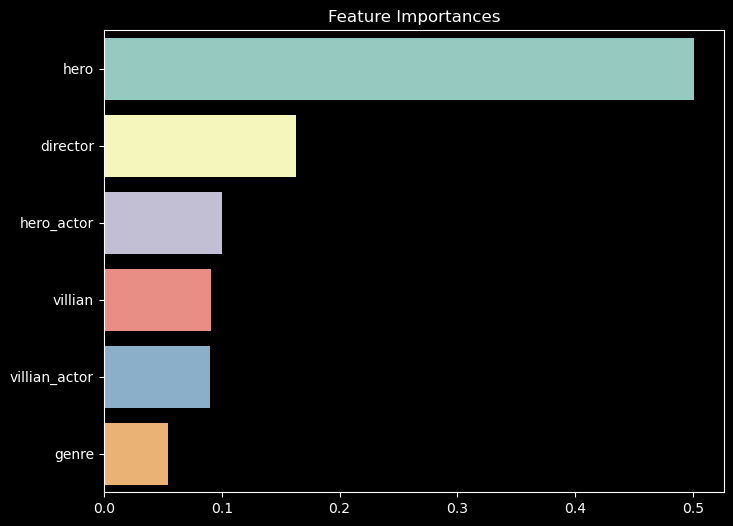

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rc('font', family='NanumBarunGothic')
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### · 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [58]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfr)

# 모델 Read
rfr_from_pickle = pickle.loads(saved_model)